In [1]:
import pandas as pd
from scipy import stats

In [2]:
df=pd.read_csv('Users/baoqiangzhang/Downloads/midterm_data.csv')

In [3]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [14]:
df.tail()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5
4999,5000,63,2,28.484907,7,10,84.15,1,Tablet,Location 3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [5]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [9]:
df.drop(df[df['device'].isnull()].index, axis=0, inplace=True)

In [12]:
df.drop(df[df['location'].isnull()].index, axis=0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4871 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4871 non-null   int64  
 1   age              4871 non-null   int64  
 2   sessions         4871 non-null   int64  
 3   time_spent       4871 non-null   float64
 4   pages_visited    4871 non-null   int64  
 5   cart_items       4871 non-null   int64  
 6   cart_value       4871 non-null   float64
 7   checkout_status  4871 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4871 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.6+ KB


In [15]:
import matplotlib.pyplot as plt

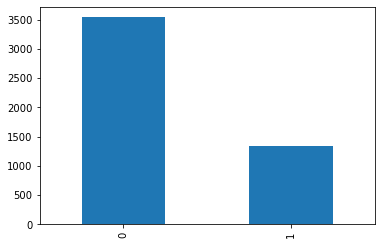

In [17]:
checkout_counts = df['checkout_status'].value_counts()
checkout_counts.plot(kind='bar')
plt.show()

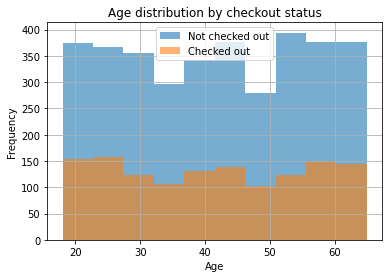

In [18]:
df.groupby('checkout_status')['age'].hist(alpha=0.6)
plt.title('Age distribution by checkout status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Not checked out', 'Checked out'])
plt.show()

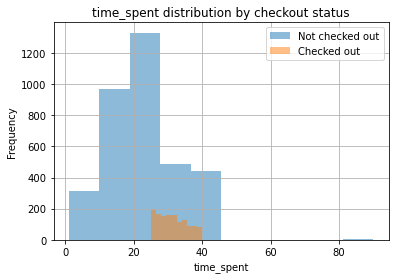

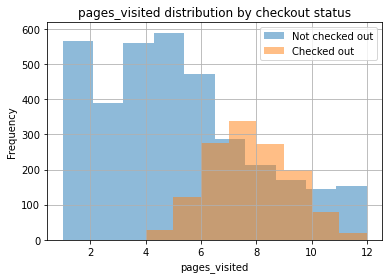

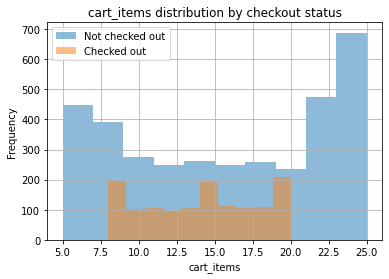

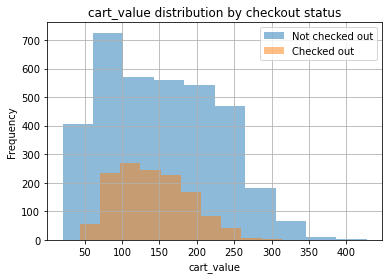

In [26]:
for column in ['time_spent', 'pages_visited', 'cart_items', 'cart_value']:
    df.groupby('checkout_status')[column].hist(alpha=0.5)
    plt.title(f'{column} distribution by checkout status')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(['Not checked out', 'Checked out'])
    plt.show()

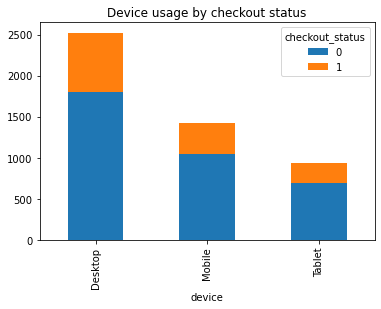

In [21]:
device_counts = df.groupby(['device', 'checkout_status']).size().unstack()
device_counts.plot(kind='bar', stacked=True)
plt.title('Device usage by checkout status')
plt.show()

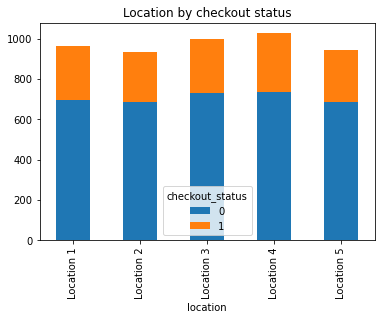

In [22]:
location_counts = df.groupby(['location', 'checkout_status']).size().unstack()
location_counts.plot(kind='bar', stacked=True)
plt.title('Location by checkout status')
plt.show()